In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "data-analytics-ue20cs312"

The first model we tries was a Multiple Linear Regression model where we just test if the model follows the assumptions of MLR and if so, we try to build a model and test its accuracy and error rates.

In [2]:
library(tidyverse)
library(quantmod)
library(ggplot2)
library(forecast)
library(tseries)
library(rugarch)
library(prophet)
library(tsfknn)
library(highcharter)
library(VIM)
library(MTS)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:purrr’:

    reduce


The following object is masked from ‘package:stats’:

    sigma


Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, splice


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports ca


 Variables sorted by number of missings: 
 Variable Count
     Date     0
     Open     0
     High     0
      Low     0
    Close     0
   Volume     0


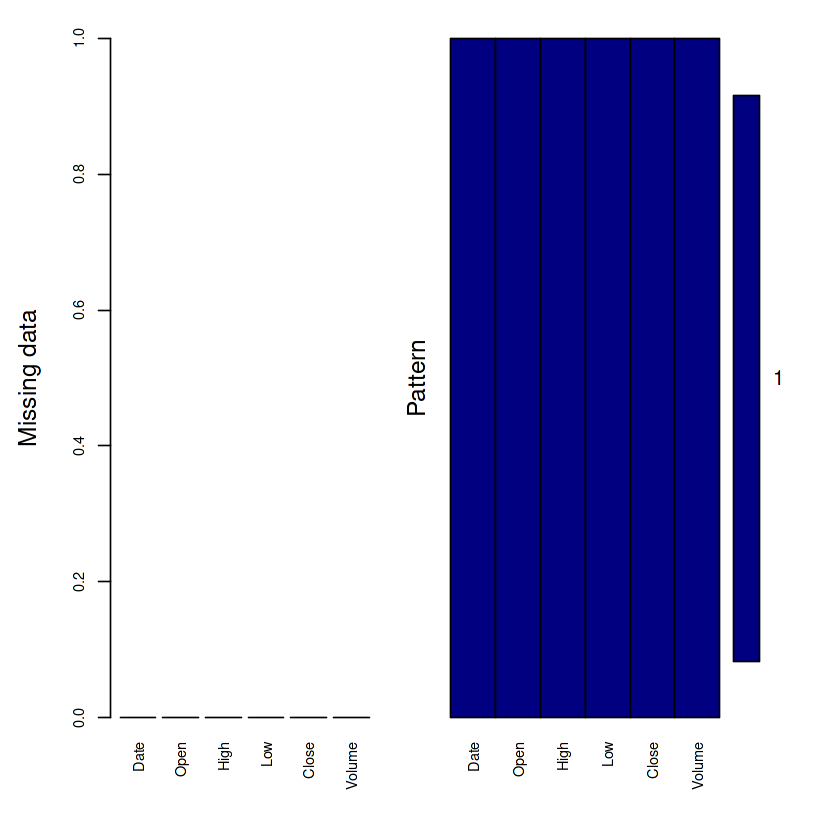

In [3]:
library(VIM)
data <- read.csv("../input/data-analytics-ue20cs312/train.csv")
test_data <- read.csv("../input/data-analytics-ue20cs312/test.csv")
missing_plot <- aggr(data, col = c('navyblue', 'yellow'),
			numbers = TRUE, sortVars = TRUE,
			labels = names(data), cex.axis = .7,
			gap = 3, ylab = c("Missing data", "Pattern"))

As we can see there is no missing data in the training dataset given.

In [4]:

data$Date <- as.Date(data$Date, "%m %d %y")
as.data.frame(scale(data[,c(2:6)]))
linear_model <- lm(Close ~ (Open+High+Low+Volume), data=data)
summary(linear_model)


Open,High,Low,Close,Volume
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.403926,-1.396798,-1.403085,-1.387227,2.2673607
-1.370689,-1.360348,-1.367571,-1.357081,0.5322292
-1.372250,-1.345434,-1.361276,-1.343709,0.6069039
-1.362268,-1.325057,-1.358533,-1.324498,2.1545947
-1.318323,-1.324689,-1.352201,-1.362604,1.2800522
-1.354758,-1.352771,-1.353666,-1.347633,0.7006653
-1.338790,-1.341332,-1.349063,-1.353622,0.6048547
-1.346225,-1.357755,-1.394272,-1.404746,1.2624869
-1.398033,-1.368091,-1.400454,-1.372219,0.8838089



Call:
lm(formula = Close ~ (Open + High + Low + Volume), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.735  -3.697  -0.093   3.860  68.669 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.477e-01  1.081e+00   0.692    0.489    
Open        -6.691e-01  2.174e-02 -30.772   <2e-16 ***
High         8.163e-01  1.727e-02  47.278   <2e-16 ***
Low          8.525e-01  1.935e-02  44.057   <2e-16 ***
Volume      -2.975e-10  1.670e-08  -0.018    0.986    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.284 on 1650 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.742e+06 on 4 and 1650 DF,  p-value: < 2.2e-16


We construct a simple Multiple Linear Regression on the pre processed dataset and try to fit the model using all features before testing it using the AIC and correlation matrix. The resultant model has an R squared value of 0.9998. While good, it is still not the best indicator for tesing if the model fits well. 

corrplot 0.92 loaded



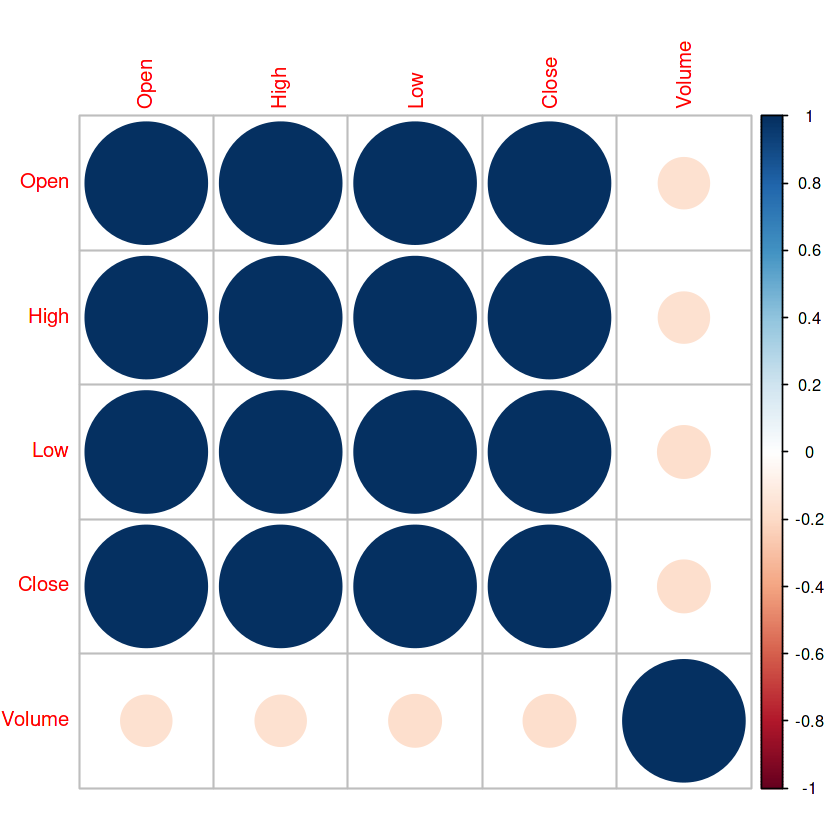

In [5]:
library(corrplot)
dat <- data[, c(2:6)]
corr_matrix<-round(cor(dat),2)
corrplot(corr_matrix)

From the above correlation matrix we can see that there is a strong correlation (negative) among the features High, Low and Open with the response variable Close. We can hence filter the model by removing the Volume as a feature.

In [6]:
linear_model2 <- lm(Close ~ (Open+Low+High), data=dat)
linear_model2
summary(linear_model2)


Call:
lm(formula = Close ~ (Open + Low + High), data = dat)

Coefficients:
(Intercept)         Open          Low         High  
     0.7337      -0.6691       0.8526       0.8162  



Call:
lm(formula = Close ~ (Open + Low + High), data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.738  -3.697  -0.099   3.862  68.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.73372    0.74247   0.988    0.323    
Open        -0.66910    0.02166 -30.889   <2e-16 ***
Low          0.85265    0.01722  49.508   <2e-16 ***
High         0.81622    0.01588  51.385   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.281 on 1651 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 2.324e+06 on 3 and 1651 DF,  p-value: < 2.2e-16


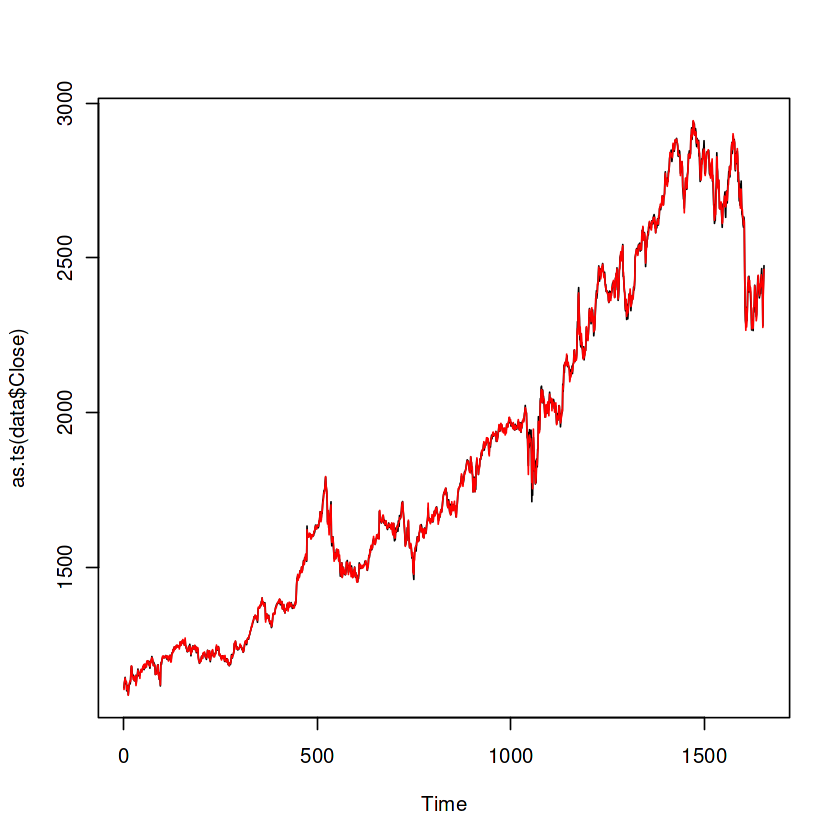

In [7]:
plot(as.ts(data$Close))
lines(linear_model2$fitted,col="red")

This graph shows that with time, the actual and fitted values of the closing prices for the stocks match very close to each other.

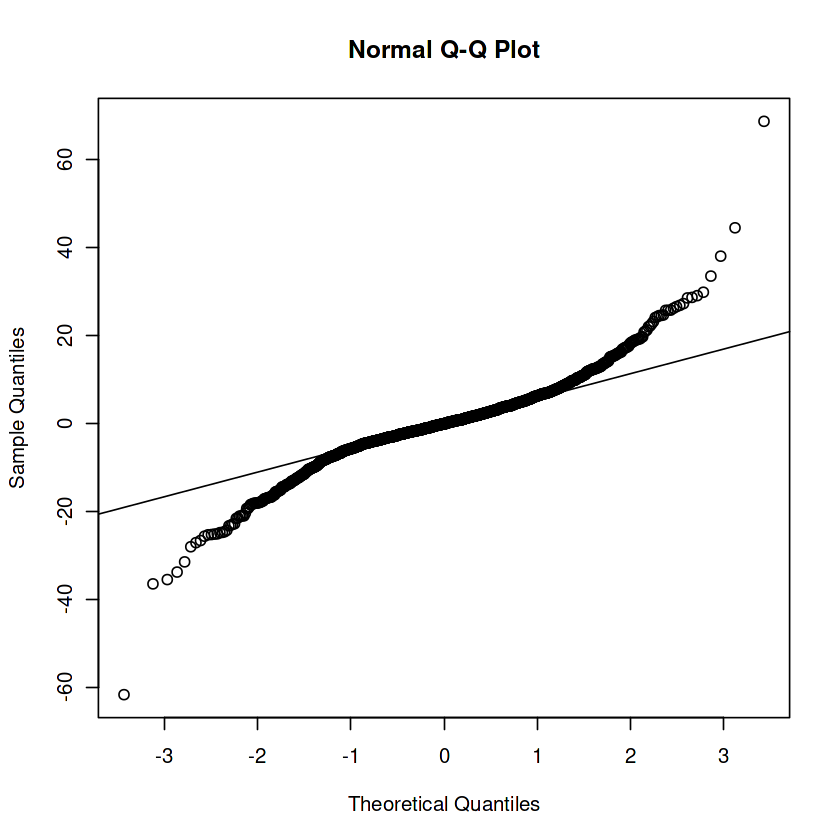

In [8]:
qqnorm(resid(linear_model2))
qqline(resid(linear_model2))

The above graph shows an approximate normal distribution in the dataset which is also in accordance with the assumptions of the MLR.

In [9]:
library(forecast)
library(ggplot2)
test<-read.csv("../input/data-analytics-ue20cs312/test.csv")
forecast_close <- forecast(linear_model2, h = 35,newdata=test)
df<-as.data.frame(forecast_close)
df[1]
#ggplot(forecast_close)+geom_point()
#plot(forecast_close)
#head(forecast_close$mean)
#head(forecast_close$upper)
#head(forecast_close$lower)

,Point Forecast
,<dbl>
1,2485.545
2,2473.793
3,2481.061
4,2437.905
5,2434.096
6,2459.607
7,2440.517
8,2483.309
9,2479.368


The predicted values of the closing price from the test data are as indicated above.

Our second model uses the concept of stationarity and ARIMA to see if we can better predict the closing prices as compared to the above process.

In [10]:
library(tidyverse)
library(quantmod)
library(ggplot2)
library(forecast)
library(tseries)
library(rugarch)
library(prophet)
library(tsfknn)
library(highcharter)
library(VIM)
library(MTS)


 Variables sorted by number of missings: 
 Variable Count
     Date     0
     Open     0
     High     0
      Low     0
    Close     0
   Volume     0


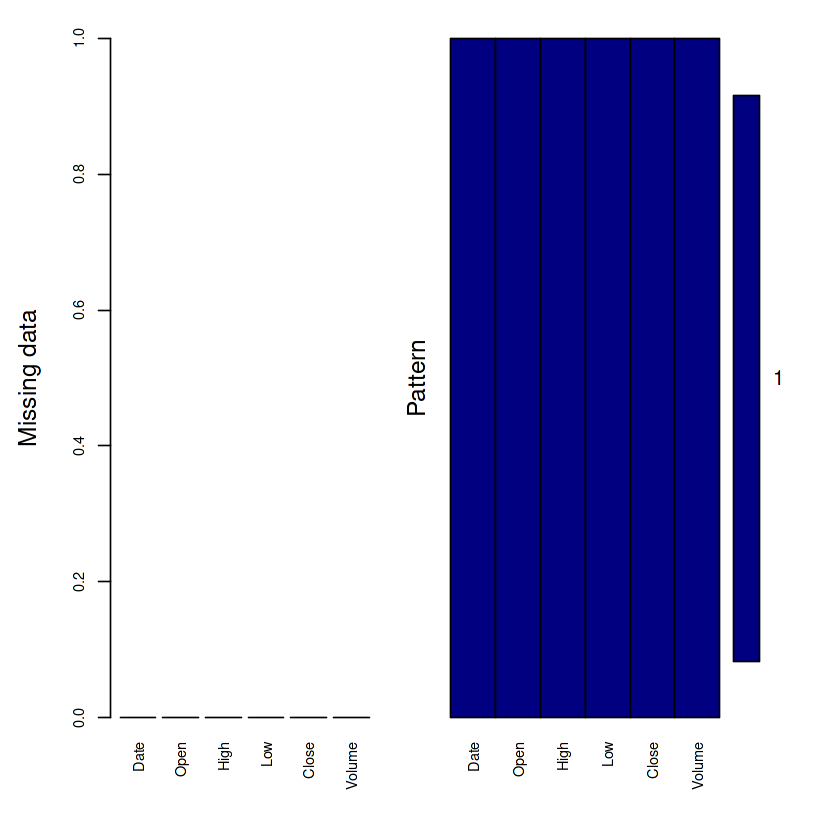

In [11]:
data <- read.csv("../input/data-analytics-ue20cs312/train.csv")
test_data <- read.csv("../input/data-analytics-ue20cs312/test.csv")
missing_plot <- aggr(data, col = c('navyblue', 'yellow'),
			numbers = TRUE, sortVars = TRUE,
			labels = names(data), cex.axis = .7,
			gap = 3, ylab = c("Missing data", "Pattern"))

The above graph shows that there are no missin g values in the dataset.


[1] "data.frame"

     Date                Open           High           Low           Close     
 Length:1655        Min.   :1090   Min.   :1107   Min.   :1072   Min.   :1088  
 Class :character   1st Qu.:1378   1st Qu.:1387   1st Qu.:1372   1st Qu.:1378  
 Mode  :character   Median :1699   Median :1714   Median :1687   Median :1702  
                    Mean   :1855   Mean   :1870   Mean   :1841   Mean   :1856  
                    3rd Qu.:2335   3rd Qu.:2365   3rd Qu.:2314   3rd Qu.:2345  
                    Max.   :2955   Max.   :2966   Max.   :2926   Max.   :2942  
     Volume         
 Min.   :  7298300  
 1st Qu.: 24533300  
 Median : 29806900  
 Mean   : 33461292  
 3rd Qu.: 37900050  
 Max.   :127686900  

An ‘xts’ object on 2016-01-04/2022-07-29 containing:
  Data: num [1:1655, 1] 16804 16805 16806 16807 16808 ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


HTML widgets cannot be represented in plain text (need html)

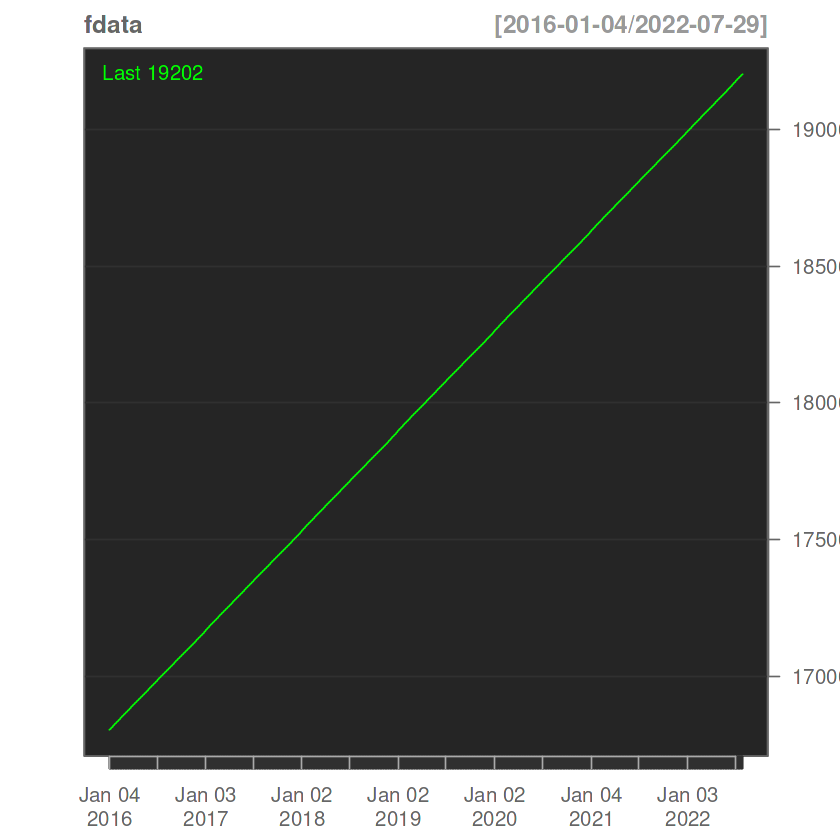

In [12]:
class(data)
summary(data)
data$Date <- as.Date(data$Date)
fdata <- xts(data[,1], order.by = data[, 1])
str(fdata)
chartSeries(fdata, type = "candlesticks")
hchart(fdata, color = "green")

From here we can see that there is no seasonality or trend in the dataset. Moreover, the dataset is of class dataframe. Hence for using the chartSeries() function, we converted the dataframe into an xts format.

In [13]:
#ADF test
print(adf.test(data$Close))


	Augmented Dickey-Fuller Test

data:  data$Close
Dickey-Fuller = -2.3467, Lag order = 11, p-value = 0.4315
alternative hypothesis: stationary



From the Augmented Dickey-Fuller test, the results show a p value > 0.05. This indicates that we accpt the null hypothesis and conclude that the data is in fact not stationary. So using an ARMA model will not be advised.

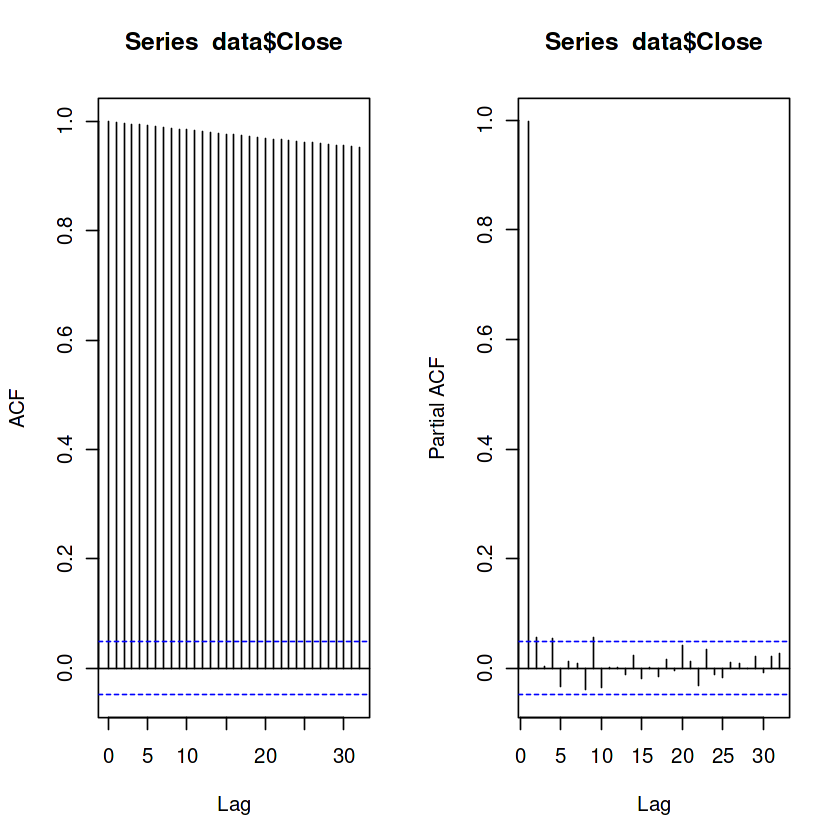

In [14]:
#acf and pacf
par(mfrow = c(1, 2))
acf(data$Close)
pacf(data$Close)
par(mfrow = c(1, 1))

From the above two graphs we can see that the q-vale from the ACF graph is 0 and the p-value from the PACF graph is 1 as it does not exponentially drop to 0.

Series: data$Close 
ARIMA(1,1,0) with drift 
Box Cox transformation: lambda= -0.6053045 

Coefficients:
          ar1  drift
      -0.1342      0
s.e.   0.0244      0

sigma^2 = 1.581e-08:  log likelihood = 12597.64
AIC=-25189.28   AICc=-25189.27   BIC=-25173.05

Training set error measures:
                     ME     RMSE     MAE          MPE      MAPE     MASE
Training set -0.1176723 22.51597 14.2198 -0.003282396 0.7446254 1.002773
                  ACF1
Training set 0.0610462

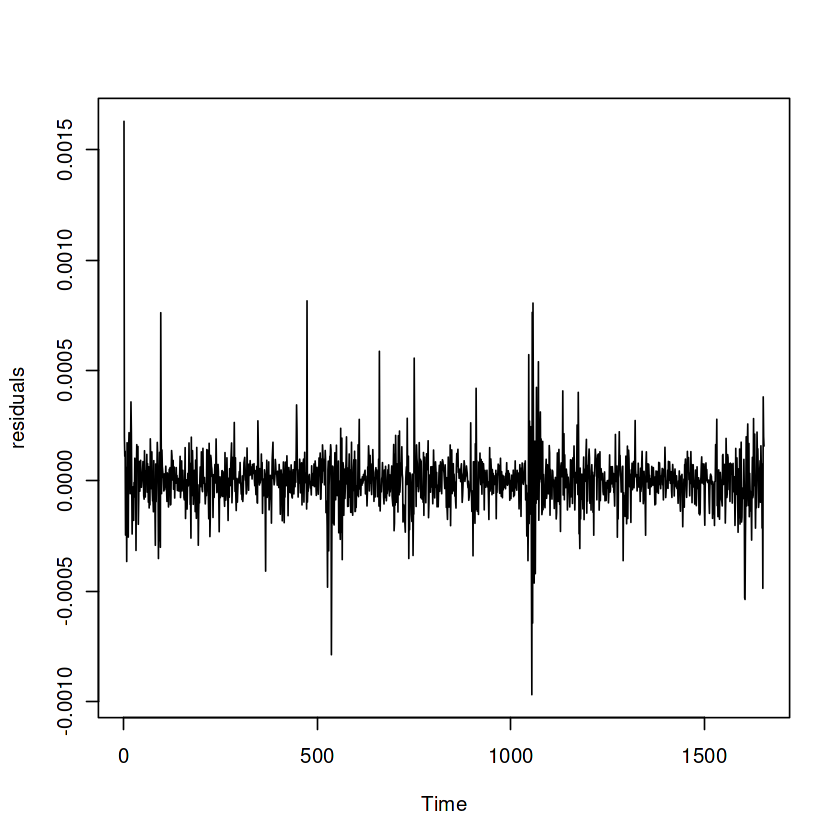

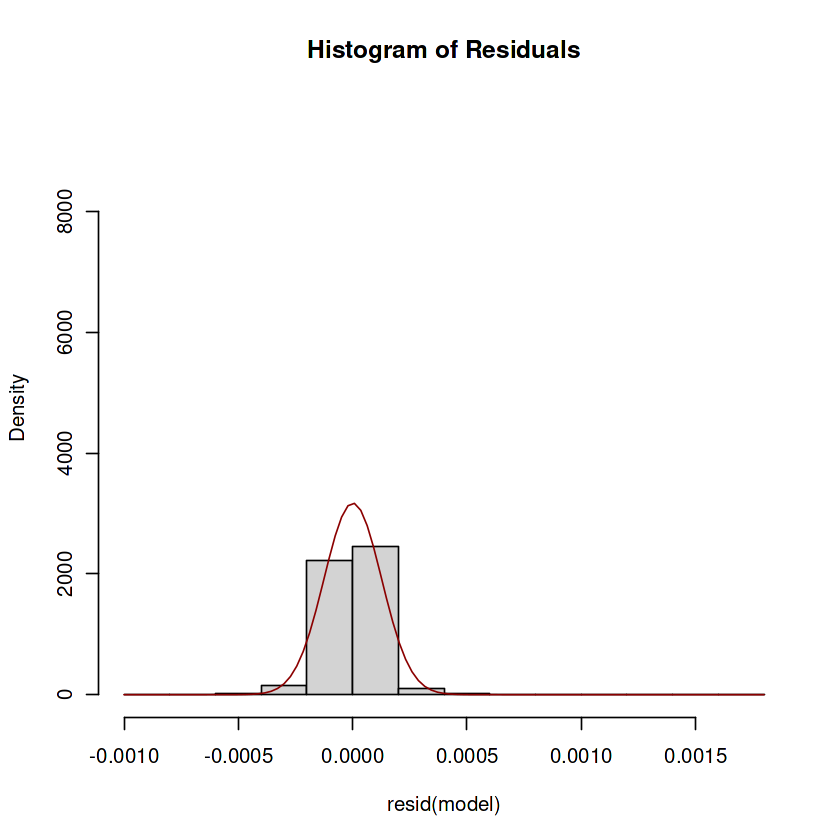

In [15]:
#arima

model <- auto.arima(data$Close, lambda = "auto")
summary(model)
#residuals
plot(resid(model), ylab = "residuals")

hist(resid(model),freq=F,ylim=c(0,9500),main="Histogram of Residuals")
e=resid(model)
curve(dnorm(x, mean=mean(e), sd=sd(e)), add=TRUE, col="darkred")

auto.arima() has directed compared the various possible p, d and q values and concluded that the bets model for the training set is arima(1, 1, 0) Where p = 1, d = 1 and q = 0.

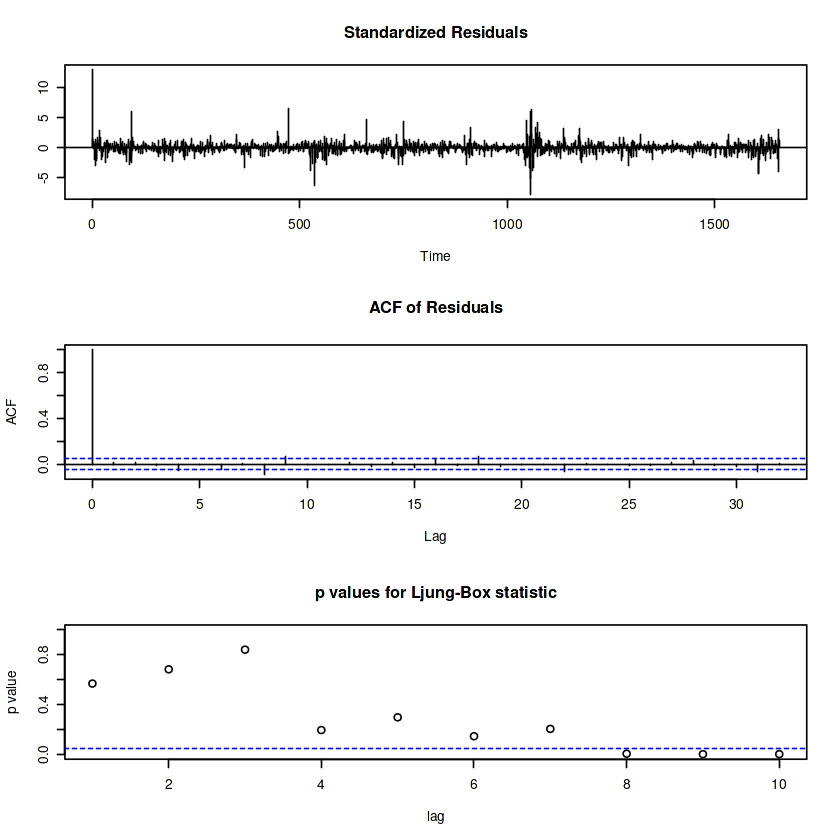

In [16]:
#diagnostics for arima
tsdiag(model)

Analysing the above we can see that the residuals do not show autocorrelation and the residuals are stationary.


	Box-Ljung test

data:  model$residuals
X-squared = 0.76279, df = 2, p-value = 0.6829



	Box-Ljung test

data:  model$residuals
X-squared = 0.32505, df = 1, p-value = 0.5686


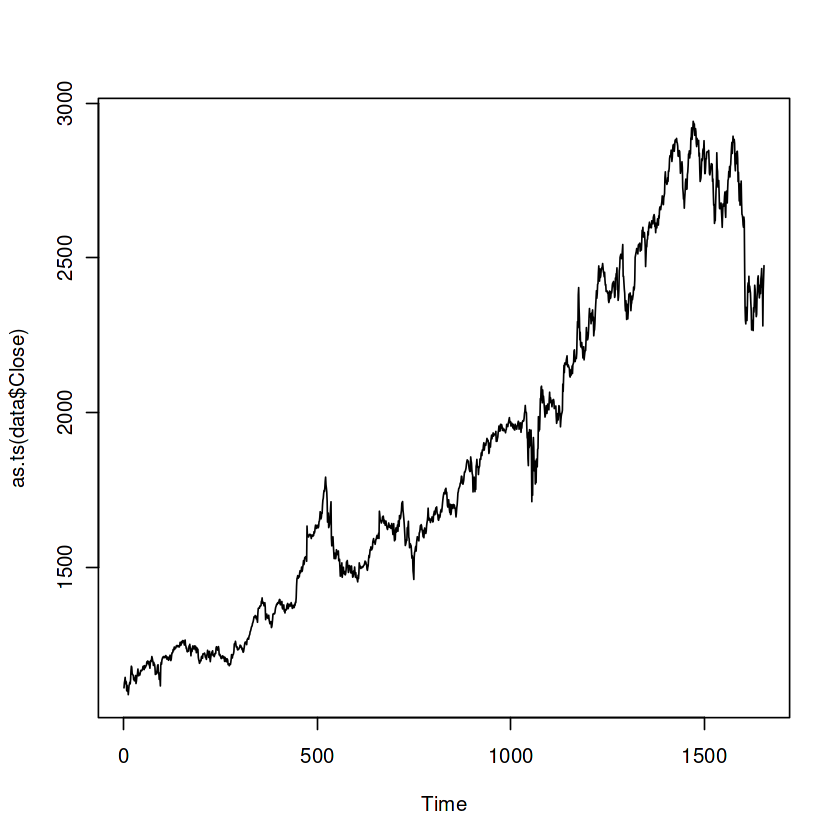

In [17]:
Box.test(model$residuals, lag= 2, type="Ljung-Box")
Box.test(model$residuals, type="Ljung-Box")
plot(as.ts(data$Close))

The Ljung-Box test reveals a p-value > 0.05 which implies that we accept the null hypothesis and state that the model does not show lack of fit.

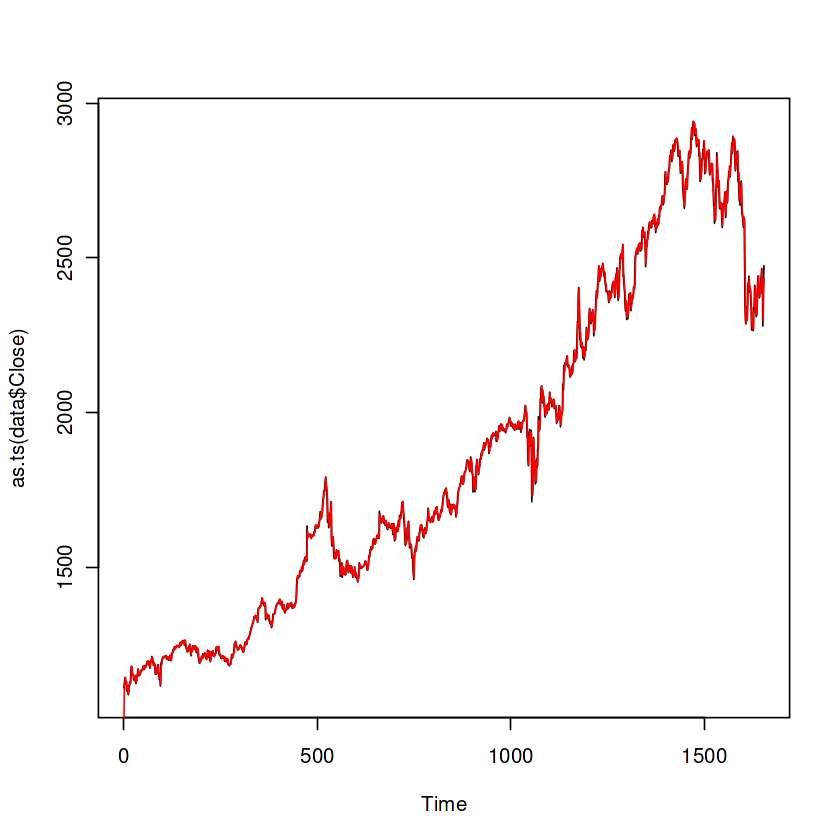

In [18]:
plot(as.ts(data$Close))
lines(model$fitted,col="red")

A Time Series:
[1] 2471.236 2473.473 2474.917 2476.468 2478.007 2479.550

,80%,95%
1656,2516.973,2541.738
1657,2534.352,2567.559
1658,2548.497,2588.881
1659,2560.961,2607.579
1660,2572.287,2624.550
1661,2582.799,2640.281


,80%,95%
1656,2426.819,2403.822
1657,2414.909,2384.802
1658,2404.688,2368.796
1659,2396.363,2355.627
1660,2389.154,2344.169
1661,2382.769,2333.967


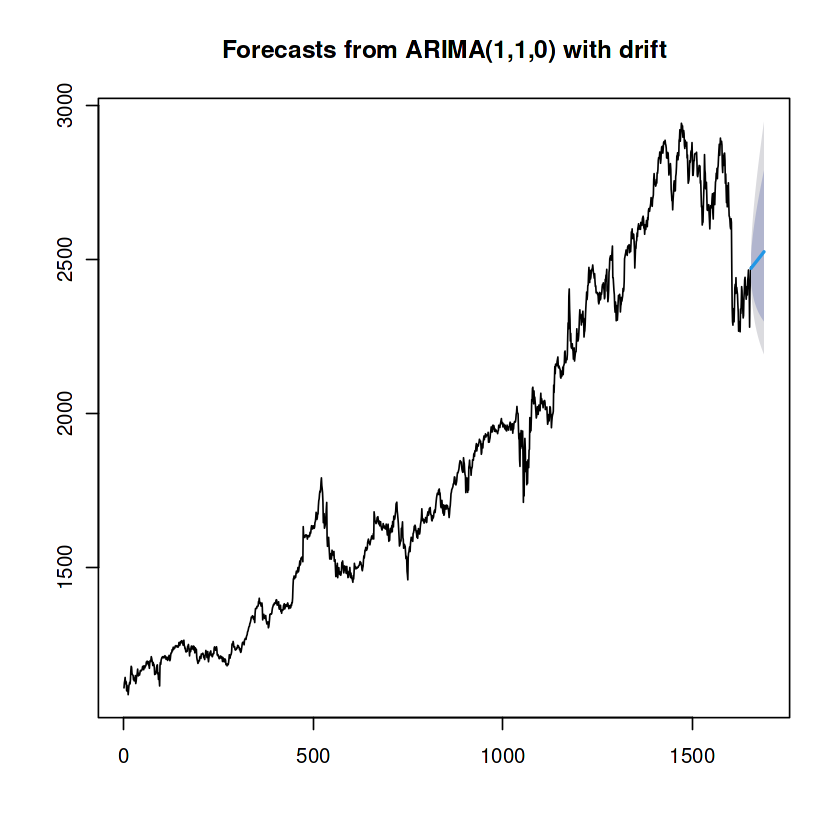

In [19]:
forecast_close <- forecast(model, h = 35)
plot(forecast_close)
head(forecast_close$mean)
head(forecast_close$upper)
head(forecast_close$lower)

The forecasted closing price values were extracted and appended to the test.csv file. 

In [20]:
forecast_close

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1656       2471.236 2426.819 2516.973 2403.822 2541.738
1657       2473.473 2414.909 2534.352 2384.802 2567.559
1658       2474.917 2404.688 2548.497 2368.796 2588.881
1659       2476.468 2396.363 2560.961 2355.627 2607.579
1660       2478.007 2389.154 2572.287 2344.169 2624.550
1661       2479.550 2382.769 2582.799 2333.967 2640.281
1662       2481.093 2377.013 2592.689 2324.722 2655.064
1663       2482.638 2371.757 2602.083 2316.241 2669.095
1664       2484.185 2366.913 2611.073 2308.387 2682.511
1665       2485.733 2362.414 2619.724 2301.058 2695.414
1666       2487.283 2358.210 2628.085 2294.178 2707.878
1667       2488.835 2354.262 2636.198 2287.687 2719.965
1668       2490.388 2350.539 2644.091 2281.538 2731.722
1669       2491.942 2347.015 2651.792 2275.691 2743.188
1670       2493.498 2343.669 2659.321 2270.116 2754.394
1671       2495.056 2340.484 2666.696 2264.784 2765.368
1672       2496.615 2337.445 2673.931 2259.673 2